# Machine learning basics
A brief introduction to some of the scientific computing used in this course. In particular the NumPy scientific computing package and its use with python.

# Outline
- [&nbsp;&nbsp;1.1 Goals](#toc_40015_1.1)
- [&nbsp;&nbsp;1.2 Useful References](#toc_40015_1.2)
- [2 Vectorization <a name='Python and NumPy'></a>](#toc_40015_2)
- [3 Model implication](#toc_40015_3)
- [4 Cost function](#toc_40015_4)
- [5 Feature scaling](#toc_40015_5)

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# library for interactive slider
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import FloatSlider

<a name="toc_40015_1.1"></a>
## 1.1 Goals
In this lab, you will:
- learn the vectorization computing using numpy library
- learn concepts of some machine learning basics including: training feature examples, training target examples, weight, bias, cost function gradient descent and feature scaling 

<a name="toc_40015_1.2"></a>
## 1.2 Useful References
- NumPy Documentation including a basic introduction: [NumPy.org](https://NumPy.org/doc/stable/)
- A challenging feature topic: [NumPy Broadcasting](https://NumPy.org/doc/stable/user/basics.broadcasting.html)

<a name="toc_40015_2"></a>
# 2 Vectorization <a name='Python and NumPy'></a>
Vectors, as you will use them in this course, are ordered arrays of numbers. In notation, vectors are denoted with lower case bold letters such as $\mathbf{x}$.  The elements of a vector are all the same type. A vector does not, for example, contain both characters and numbers. The number of elements in the array is often referred to as the *dimension* though mathematicians may prefer *rank*. The vector shown has a dimension of $n$. The elements of a vector can be referenced with an index. In math settings, indexes typically run from 1 to n. In computer science and these labs, indexing will typically run from 0 to n-1.  In notation, elements of a vector, when referenced individually will indicate the index in a subscript, for example, the $0^{th}$ element, of the vector $\mathbf{x}$ is $x_0$. Note, the x is not bold in this case.  


## Data Creation
Data creation routines in NumPy will generally have a first parameter which is the shape of the object. This can either be a single value for a 1-D result or a tuple 
(n,m,...) specifying the shape of the result.

In [104]:
a = np.zeros(4);                
print(f"np.zeros(4) :   a = {a}, a shape = {a.shape}, a data type = {a.dtype}") # Notice the f here
a = np.zeros((4,));             
print(f"np.zeros(4,) :  a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.random_sample(4); 
print(f"np.random.random_sample(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.zeros(4) :   a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.zeros(4,) :  a = [0. 0. 0. 0.], a shape = (4,), a data type = float64
np.random.random_sample(4): a = [0.93738809 0.67401979 0.50149443 0.8801806 ], a shape = (4,), a data type = float64


In [105]:
a = np.arange(4.);              
print(f"np.arange(4.):     a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.random.rand(4);          
print(f"np.random.rand(4): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.arange(4.):     a = [0. 1. 2. 3.], a shape = (4,), a data type = float64
np.random.rand(4): a = [0.70930699 0.04369385 0.30642602 0.02081125], a shape = (4,), a data type = float64


In [106]:
a = np.array([5,4,3,2]);  
print(f"np.array([5,4,3,2]):  a = {a}, a shape = {a.shape}, a data type = {a.dtype}")
a = np.array([5.,4,3,2]); 
print(f"np.array([5.,4,3,2]): a = {a}, a shape = {a.shape}, a data type = {a.dtype}")

np.array([5,4,3,2]):  a = [5 4 3 2], a shape = (4,), a data type = int64
np.array([5.,4,3,2]): a = [5. 4. 3. 2.], a shape = (4,), a data type = float64


## Operations on Vectors
**Indexing** means referring to *an element* of an array by its position within the array.  
**Slicing** means getting a *subset* of elements from an array based on their indices. 

In [107]:
# Indexing
#vector indexing operations on 1-D vectors
a = np.arange(10)
print(a)

#access an element
print(f"a[2].shape: {a[2].shape} a[2]  = {a[2]}, Accessing an element returns a scalar")

# access the last element, negative indexes count from the end
print(f"a[-1] = {a[-1]}")

#indexs must be within the range of the vector or they will produce and error
# please notice the try...except... structure here
try:
    c = a[10]
except Exception as e:
    print("The error message you'll see is:")
    print(e)

[0 1 2 3 4 5 6 7 8 9]
a[2].shape: () a[2]  = 2, Accessing an element returns a scalar
a[-1] = 9
The error message you'll see is:
index 10 is out of bounds for axis 0 with size 10


In [108]:
#vector slicing operations
a = np.arange(10)
print(f"a        =  {a}")

#access 5 consecutive elements (start:stop:step)
c = a[2:7:1]   
print("a[2:7:1] = ", c)

# access 3 elements separated by two 
c = a[2:7:2]   
print("a[2:7:2] = ", c)

# access all elements index 3 and above
c = a[3:]     
print("a[3:]    = ", c)

# access all elements below index 3
c = a[:3]    
print("a[:3]    = ", c)

# access all elements
c = a[:]        
print("a[:]     = ", c)

a        =  [0 1 2 3 4 5 6 7 8 9]
a[2:7:1] =  [2 3 4 5 6]
a[2:7:2] =  [2 4 6]
a[3:]    =  [3 4 5 6 7 8 9]
a[:3]    =  [0 1 2]
a[:]     =  [0 1 2 3 4 5 6 7 8 9]


## Single vector operations

In [109]:
a = np.array([1,2,3,4])
print(f"a             : {a}")
# negate elements of a
b = -a 
print(f"'b = -a'        : {b}")

# sum all elements of a, returns a scalar
b = np.sum(a) 
print(f"'b = np.sum(a)' : {b}")

b = np.mean(a)
print(f"'b = np.mean(a)': {b}")

b = a**2
print(f"'b = a**2'      : {b}")

a             : [1 2 3 4]
'b = -a'        : [-1 -2 -3 -4]
'b = np.sum(a)' : 10
'b = np.mean(a)': 2.5
'b = a**2'      : [ 1  4  9 16]


## Vector Vector element-wise operations

In [110]:
a = np.array([ 1, 2, 3, 4])
b = np.array([-1,-2, 3, 4])
print(f"Binary operators work element wise: {a + b}")

Binary operators work element wise: [0 0 6 8]


## Scalar Vector operations

In [111]:
a = np.array([1, 2, 3, 4])

# multiply a by a scalar
b = 5 * a
print(f"b = 5 * a : {b}")

b = 5 * a : [ 5 10 15 20]


## Vector Vector dot product

In [112]:
# test 1-D
a = np.array([1, 2, 3, 4])
b = np.array([-1, 4, 3, 2])
c = np.dot(a, b)
print(f"np.dot(a, b) = {c}, np.dot(a, b).shape = {c.shape} ")
print(f"a.shape = {a.shape} ")
c = np.dot(b, a)
print(f"np.dot(b, a) = {c}, np.dot(a, b).shape = {c.shape} ")

np.dot(a, b) = 24, np.dot(a, b).shape = () 
a.shape = (4,) 
np.dot(b, a) = 24, np.dot(a, b).shape = () 


## Matrix Creation
The same functions that created 1-D vectors will create 2-D or n-D arrays

In [113]:
a = np.zeros((2, 5))                                       
print(f"a shape = {a.shape}, a = {a}")                     

a = np.ones((2, 3))                                                                   
print(f"a shape = {a.shape}, a = {a}") 

a = np.random.random_sample((3, 3))  
print(f"a shape = {a.shape}, a = {a}") 

a shape = (2, 5), a = [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
a shape = (2, 3), a = [[1. 1. 1.]
 [1. 1. 1.]]
a shape = (3, 3), a = [[0.21750007 0.97511743 0.70635404]
 [0.15068121 0.97927504 0.41589622]
 [0.20003628 0.78031498 0.0620535 ]]


In [114]:
# Indexing
#vector indexing operations on matrices
a = np.arange(6).reshape(-1, 2)   #reshape is a convenient way to create matrices
print(f"a.shape: {a.shape}, \na= {a}")

#access an element
print(f"\na[2,0].shape:{a[2, 0].shape} ,  a[2,0] = {a[2, 0]}")

#access a row
print(f"a[2].shape:{a[2].shape}")

a.shape: (3, 2), 
a= [[0 1]
 [2 3]
 [4 5]]

a[2,0].shape:() ,  a[2,0] = 4
a[2].shape:(2,)


In [115]:
# Slicing
#vector 2-D slicing operations
a = np.arange(20).reshape(-1, 10)
print(f"a = \n{a}")

#access 5 consecutive elements (start:stop:step)
print("\na[0, 2:7:1] = ", a[0, 2:7:1], ",  a[0, 2:7:1].shape =", a[0, 2:7:1].shape, "a 1-D array")

#access 5 consecutive elements (start:stop:step) in two rows
print("\na[:, 2:7:1] = \n", a[:, 2:7:1], ",  a[:, 2:7:1].shape =", a[:, 2:7:1].shape, "a 2-D array")

# access all elements
print("\na[:,:] = \n", a[:,:], ",  a[:,:].shape =", a[:,:].shape)

# access all elements in one row (very common usage)
print("\na[1,:] = ", a[1,:], ",  a[1,:].shape =", a[1,:].shape, "a 1-D array")
# same as
print("\na[1]   = ", a[1],   ",  a[1].shape   =", a[1].shape, "a 1-D array")

a = 
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]

a[0, 2:7:1] =  [2 3 4 5 6] ,  a[0, 2:7:1].shape = (5,) a 1-D array

a[:, 2:7:1] = 
 [[ 2  3  4  5  6]
 [12 13 14 15 16]] ,  a[:, 2:7:1].shape = (2, 5) a 2-D array

a[:,:] = 
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]] ,  a[:,:].shape = (2, 10)

a[1,:] =  [10 11 12 13 14 15 16 17 18 19] ,  a[1,:].shape = (10,) a 1-D array

a[1]   =  [10 11 12 13 14 15 16 17 18 19] ,  a[1].shape   = (10,) a 1-D array


<a name="toc_40015_3"></a>
# 3 Model implication 
In this part, we will introduce the concept of training feature examples, training target examples, weight and bias.


Below is a summary of some of the notation you will encounter.

|General <img width=70/> <br />  Notation  <img width=70/> | Description<img width=350/>| Python (if applicable) |
|: ------------|: ------------------------------------------------------------||
| $a$ | scalar, non bold                                                      ||
| $\mathbf{a}$ | vector, bold                                                      ||
| **Regression** |         |    |     |
|  $\mathbf{x}$ | Training Example feature values   | `x_train` |   
|  $\mathbf{y}$  | Training Example  targets   | `y_train` 
|  $x^{(i)}$, $y^{(i)}$ | $i_{th}$Training Example | `x_i`, `y_i`|
| m | Number of training examples | `m`|
|  $w$  |  parameter: weight                                 | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w,b$: $f_{w,b}(x^{(i)}) = wx^{(i)}+b$  | `f_wb` | 


## Problem Statement
This lab will use a simple data set with only two data points - a basin with evaporation rate of 5 mm/d under the average temperature 15.0 degree and a basin with evaporation rate of 13 mm/d under the average temperature 25.5 degree. These two points will constitute our *data or training set*. 

| evaporation rate(mm/d)     | average temperature(degree) |
| -------------------| ------------------------ |
| 5.0               | 15.0                      |
| 13.0               | 25.5                      |

You would like to fit a linear regression model through these two points, so you can then predict evaporation rate under other temperature.

In [116]:
# x_train is the input variable (average temperature)
# y_train is the target (evaporation rate)
x_train = np.array([15.0, 5.0])
y_train = np.array([25.5, 13.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

# number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

# the i_th example
i = 0 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

# plot the data
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the y-axis label
plt.ylabel('temperature (degree)')
# Set the x-axis label
plt.xlabel('evaporation rate (mm/d)')
plt.show()

x_train = [15.  5.]
y_train = [25.5 13. ]
x_train.shape: (2,)
Number of training examples is: 2
(x^(0), y^(0)) = (15.0, 25.5)


## Model function
The model function for linear regression (which is a function that maps from `x` to `y`) is represented as 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. 

**Note: You can come back to this cell to adjust the model's w and b parameters**

In [117]:
w = 0.5
b = 2
print(f"w: {w}")
print(f"b: {b}")

w: 0.5
b: 2


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as - 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

In [118]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

In [119]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# plot the data
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the y-axis label
plt.ylabel('temperature (degree)')
# Set the x-axis label
plt.xlabel('evaporation rate (mm/d)')
plt.legend()
plt.show()

Now go back to the cell before, let us try experimenting with different values of $w$ and $b$. What should the values be for a line that fits our data?

<a name="toc_40015_4"></a>
# 4 Cost function
A cost function is a measure of how well a machine learning model performs by quantifying the difference between predicted and actual outputs. Its goal is to be minimized by adjusting the model’s parameters during training.

In [120]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [121]:
# try different w and b
w = 1.0

cost = compute_cost(x_train, y_train, w, b,)
print(cost)

27.0625


<IPython.core.display.Javascript object>


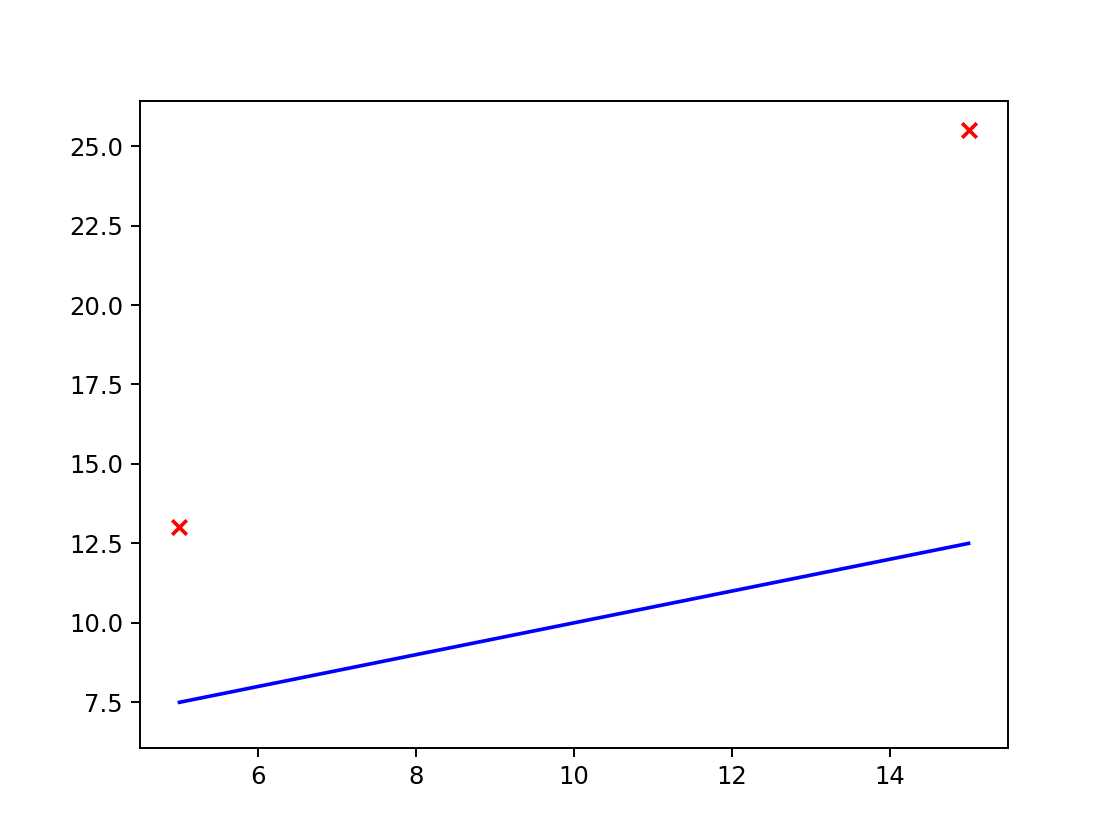

interactive(children=(FloatSlider(value=0.5, description='w', max=2.5, min=0.5, step=0.005), FloatSlider(value…

In [122]:
# use the slider control to select the value of w and b
x_widget = FloatSlider(min=0.5, max=2.5, step=0.005)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.005, value=5.0)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
tmp_f_wb = compute_model_output(x_train, w, b,)
line, = ax.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
def update(w , b ):
    tmp_f_wb = compute_model_output(x_train, w, b,)
    line.set_ydata( tmp_f_wb)
    fig.canvas.draw_idle()
    print("Cost value =" + str(compute_cost(x_train, y_train, w, b,)))
interact(update,w=x_widget, b=y_widget);

<a name="toc_40015_5"></a>
# 5 Feature Scaling
This section shows the importance of rescaling the dataset so the features have a similar range.

## z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [123]:
#Z-score
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 
#check our work
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

<IPython.core.display.Javascript object>


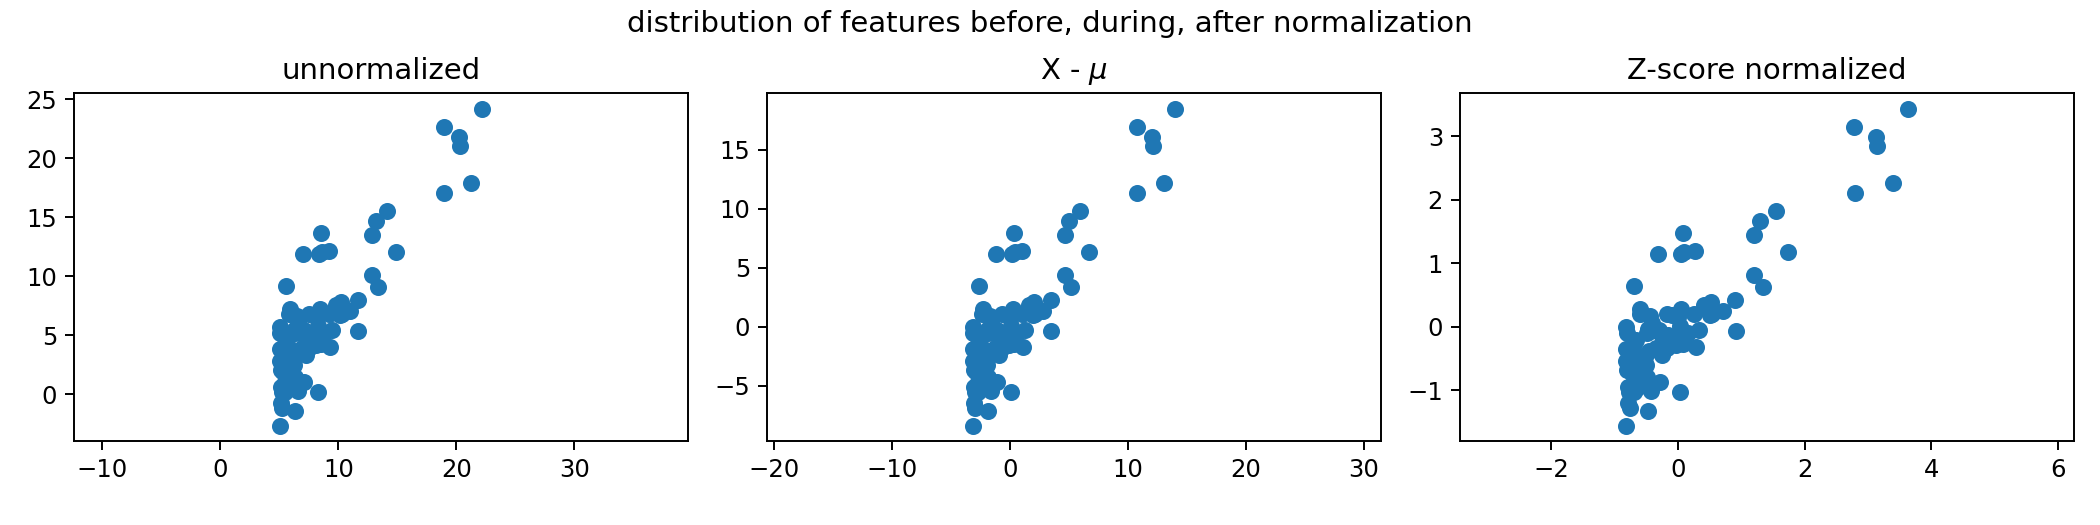

In [124]:
data = pd.read_csv('data.csv')
X_train = np.array(data)

mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,1])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,1])
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,1])
ax[2].set_title(r"Z-score normalized")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribution of features before, during, after normalization")
plt.show()